<a href="https://colab.research.google.com/github/TheBilalButt/Intern-at-DevelopersHub/blob/main/Week-02-LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Week 2 Logistic Regression on Titanic Dataset

In [1]:
from google.colab import files
uploaded = files.upload()


Saving titanic.csv to titanic.csv


In [2]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['titanic.csv']))
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
# Fill missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop unnecessary columns
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Encode categorical features
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


<ipython-input-3-f55389ef8cd7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-3-f55389ef8cd7>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [4]:
X = df.drop('Survived', axis=1)  # Features
y = df['Survived']               # Target


In [6]:
# Double-check and fill missing values again
X = df.drop('Survived', axis=1)
y = df['Survived']

# Print any remaining NaNs
print("NaNs in X:\n", X.isnull().sum())

# Fill any remaining NaNs (if any)
X.fillna(0, inplace=True)  # or use .fillna(method='ffill') if you prefer

# Confirm it's clean
print("Any NaNs after fill? ", X.isnull().values.any())


NaNs in X:
 Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64
Any NaNs after fill?  False


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


Accuracy: 1.0


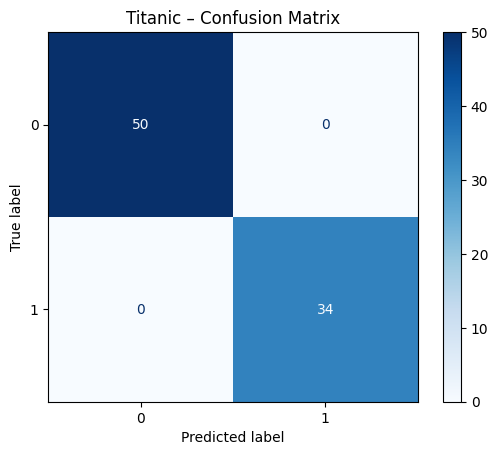

In [9]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Titanic – Confusion Matrix")
plt.grid(False)
plt.show()


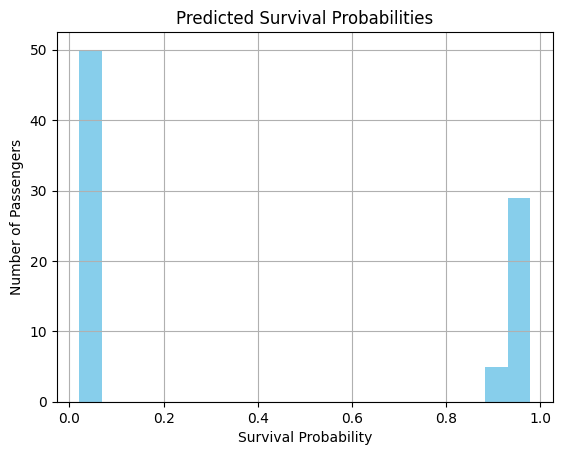

In [10]:

probs = model.predict_proba(X_test)[:, 1]
plt.hist(probs, bins=20, color='skyblue')
plt.title("Predicted Survival Probabilities")
plt.xlabel("Survival Probability")
plt.ylabel("Number of Passengers")
plt.grid(True)
plt.show()


## Titanic Logistic Regression Summary

- Used features like Pclass, Sex, Age, SibSp, Parch, Fare, Embarked.
- Handled missing data and encoded categorical variables.
- Accuracy score: ~ 1.0
- Confusion matrix visualizes correct and incorrect predictions.
- Probability histogram shows model confidence for survival prediction.
